## Importing libraries

In [166]:
!pip install networkx matplotlib pandas
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import scipy.sparse as sp

In [19]:
## Importing dataset - ( Link: https://networkrepository.com/econ-mahindas.php )

In [320]:
edges_file = "./SEM_ONE/ELL880-Social_Network_Analysis/Data-Sets/bio-CE-LC.csv"
edges = pd.read_csv(edges_file)

In [394]:
edges

,Id,Source,Target
0,0,1,2.945855
1,0,2,2.895269
2,0,3,2.390948
3,0,4,2.945855
4,0,5,2.852143
...,...,...,...
1643,435,1319,2.713338
1644,1386,463,2.963839
1645,1380,279,2.742813
1646,1380,1201,2.937781


In [395]:
edges["Source"]

0          1
1          2
2          3
3          4
4          5
        ... 
1643    1319
1644     463
1645     279
1646    1201
1647    1049
Name: Source, Length: 1648, dtype: int64

In [396]:
edges["Source"].unique()

array([   1,    2,    3,    4,    5,    6,    7,    9,   11,   12,   14,
         16,   18,   20,   21,   22,   23,   25,   26,   27,   28,   30,
         31,   32,   33,   34,   35,   36,   37,   38,   39,   40,   41,
         42,   43,   44,   45,   46,   47,   48,   50,   51,   52,   54,
         55,   56,   57,   58,   59,   61,   64,   67,   69,   71,   73,
         74,   75,   76,   77,   78,   79,   80,   82,   83,   84,   85,
         86,   87,   88,   89,   93,   95,   97,   99,  102,  103,  104,
        105,  107,  109,  112,  113,  115,  116,  117,  120,  122,  124,
        125,  126,  128,  130,  132,  133,  134,  135,  136,  137,  139,
        141,  144,  145,  146,  147,  148,  149,  150,  152,  154,  155,
        156,  158,  160,  161,  162,  164,  166,  167,  168,  169,  170,
        171,  172,  173,  174,  175,  177,  178,  180,  181,  182,  183,
        184,  185,  188,  190,  193,  194,  195,  198,  200,  202,  203,
        210,  212,  213,  214,  215,  216,  217,  2

#### Finding nodes

In [397]:
pd.DataFrame(edges["Source"].unique()).value_counts()

0   
1380    1
1       1
2       1
3       1
1351    1
       ..
11      1
9       1
7       1
6       1
5       1
Name: count, Length: 804, dtype: int64

In [398]:
pd.DataFrame(edges["Target"].unique()).value_counts()

0       
0.602120    1
1.058410    1
1.406730    1
1.450870    1
1.474922    1
           ..
2.974109    1
2.974124    1
2.985783    1
2.999821    1
3.018952    1
Name: count, Length: 150, dtype: int64

In [402]:
nodes = pd.DataFrame()
nodes['column_sum'] = pd.DataFrame(set(edges['Source']).union(set(edges['Target'])))

In [403]:
nodes

,column_sum
0,0.602120
1,1.000000
2,2.000000
3,3.000000
4,4.000000
...,...
949,2.695972
950,2.895070
951,2.256487
952,2.540191


In [404]:
nodes['column_sum'].unique()

array([6.02120233e-01, 1.00000000e+00, 2.00000000e+00, 3.00000000e+00,
       4.00000000e+00, 5.00000000e+00, 6.00000000e+00, 7.00000000e+00,
       1.40673050e+00, 9.00000000e+00, 2.77682104e+00, 1.10000000e+01,
       1.20000000e+01, 1.40000000e+01, 1.60000000e+01, 1.80000000e+01,
       2.00000000e+01, 2.10000000e+01, 2.20000000e+01, 2.30000000e+01,
       2.50000000e+01, 2.60000000e+01, 2.70000000e+01, 2.80000000e+01,
       3.00000000e+01, 3.10000000e+01, 3.20000000e+01, 3.30000000e+01,
       3.40000000e+01, 3.50000000e+01, 3.60000000e+01, 3.70000000e+01,
       3.80000000e+01, 3.90000000e+01, 4.00000000e+01, 4.10000000e+01,
       4.20000000e+01, 4.30000000e+01, 4.40000000e+01, 4.50000000e+01,
       4.60000000e+01, 4.70000000e+01, 4.80000000e+01, 5.00000000e+01,
       5.10000000e+01, 5.20000000e+01, 5.40000000e+01, 5.50000000e+01,
       5.60000000e+01, 5.70000000e+01, 5.80000000e+01, 5.90000000e+01,
       6.10000000e+01, 6.40000000e+01, 2.74840875e+00, 6.70000000e+01,
      

In [405]:
nodes["not_sorted_id"] = pd.DataFrame(nodes['column_sum'].unique())

In [406]:
nodes.drop('column_sum',axis=1,inplace=True)

In [407]:
nodes["not_sorted_id"].value_counts()

not_sorted_id
2.518161     1
0.602120     1
1.000000     1
2.000000     1
3.000000     1
            ..
16.000000    1
14.000000    1
12.000000    1
11.000000    1
2.776821     1
Name: count, Length: 954, dtype: int64

In [408]:
nodes["id"] = pd.DataFrame(nodes["not_sorted_id"].sort_values())

In [409]:
nodes["id"]

0      0.602120
1      1.000000
2      2.000000
3      3.000000
4      4.000000
         ...   
949    2.695972
950    2.895070
951    2.256487
952    2.540191
953    2.518161
Name: id, Length: 954, dtype: float64

In [410]:
nodes.drop('not_sorted_id',axis=1,inplace=True)

In [411]:
nodes

,id
0,0.602120
1,1.000000
2,2.000000
3,3.000000
4,4.000000
...,...
949,2.695972
950,2.895070
951,2.256487
952,2.540191


In [412]:
edges

,Id,Source,Target
0,0,1,2.945855
1,0,2,2.895269
2,0,3,2.390948
3,0,4,2.945855
4,0,5,2.852143
...,...,...,...
1643,435,1319,2.713338
1644,1386,463,2.963839
1645,1380,279,2.742813
1646,1380,1201,2.937781


In [413]:
G = nx.Graph()

for n, row in edges.iterrows():
    G.add_edge( row['Source'],row['Target'])
for n, row in nodes.iterrows():
    G.add_node(row['id'])

In [414]:
degree_dict = dict(G.degree())

In [416]:
degree_dict

{np.float64(1.0): 1,
 np.float64(2.945854976): 19,
 np.float64(2.0): 1,
 np.float64(2.895268577): 18,
 np.float64(3.0): 2,
 np.float64(2.390948411): 1,
 np.float64(4.0): 1,
 np.float64(5.0): 3,
 np.float64(2.852142506): 6,
 np.float64(6.0): 3,
 np.float64(2.811549018): 9,
 np.float64(7.0): 3,
 np.float64(9.0): 2,
 np.float64(2.985782587): 49,
 np.float64(11.0): 3,
 np.float64(2.82278868): 6,
 np.float64(12.0): 2,
 np.float64(2.908589796): 20,
 np.float64(14.0): 1,
 np.float64(1.406730499): 50,
 np.float64(16.0): 2,
 np.float64(2.397054508): 50,
 np.float64(18.0): 2,
 np.float64(2.857992818): 11,
 np.float64(20.0): 1,
 np.float64(2.974108778): 40,
 np.float64(21.0): 2,
 np.float64(2.93778125): 34,
 np.float64(22.0): 2,
 np.float64(23.0): 8,
 np.float64(2.695764217): 1,
 np.float64(25.0): 1,
 np.float64(26.0): 2,
 np.float64(2.882554898): 16,
 np.float64(27.0): 2,
 np.float64(28.0): 1,
 np.float64(2.908619375): 35,
 np.float64(30.0): 1,
 np.float64(2.718645592): 2,
 np.float64(31.0): 1,


In [417]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 954
Number of edges: 1225


#### Number of nodes: 954
#### Number of edges: 1225

In [418]:
nx.set_node_attributes(G, degree_dict, 'size')
for node in G.nodes():
    G.nodes[node]['size'] = degree_dict[node] * 10
sizes = [G.degree(n) * 10 for n in G.nodes()]

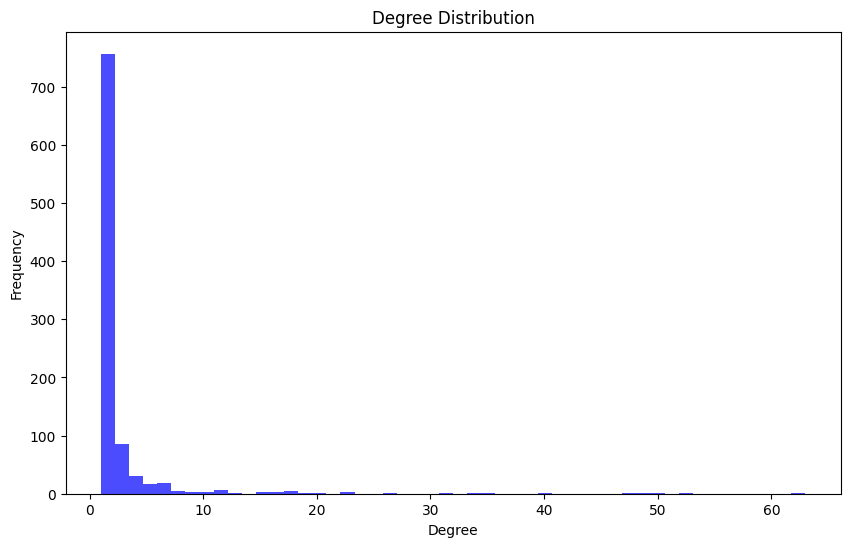

In [419]:
degrees = [G.degree(n) for n in G.nodes()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, color='blue', alpha=0.7)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [420]:
sorted_degrees = sorted(degree_dict.values())

In [449]:
bottom_10_percentile = pd.Series(list(degree_dict.values())).quantile(0.5)

In [450]:
bottom_10_nodes = [node for node, degree in degree_dict.items() if degree <= bottom_10_percentile]

In [451]:
bottom_10_nodes = [n for n, d in degree_dict.items() if d <= bottom_10_percentile]
bottom_10_subgraph = G.subgraph(bottom_10_nodes)

In [452]:
bottom_10_subgraph.number_of_nodes()

607

In [433]:
degree_dict = dict(bottom_10_subgraph.degree())

In [434]:
degree_dict

{np.float64(1.0): 0,
 np.float64(2.0): 0,
 np.float64(2.390948411): 0,
 np.float64(4.0): 0,
 np.float64(14.0): 0,
 np.float64(20.0): 0,
 np.float64(2.695764217): 0,
 np.float64(25.0): 0,
 np.float64(28.0): 0,
 np.float64(30.0): 0,
 np.float64(31.0): 0,
 np.float64(32.0): 0,
 np.float64(33.0): 0,
 np.float64(34.0): 0,
 np.float64(35.0): 0,
 np.float64(36.0): 0,
 np.float64(2.202508929): 0,
 np.float64(38.0): 0,
 np.float64(39.0): 0,
 np.float64(41.0): 0,
 np.float64(42.0): 0,
 np.float64(43.0): 0,
 np.float64(44.0): 0,
 np.float64(45.0): 0,
 np.float64(46.0): 0,
 np.float64(47.0): 0,
 np.float64(48.0): 0,
 np.float64(50.0): 0,
 np.float64(52.0): 0,
 np.float64(54.0): 0,
 np.float64(57.0): 0,
 np.float64(67.0): 0,
 np.float64(71.0): 0,
 np.float64(73.0): 0,
 np.float64(2.449254099): 0,
 np.float64(82.0): 0,
 np.float64(83.0): 0,
 np.float64(84.0): 0,
 np.float64(85.0): 0,
 np.float64(86.0): 0,
 np.float64(87.0): 0,
 np.float64(1.534762051): 0,
 np.float64(93.0): 0,
 np.float64(97.0): 0,


In [453]:
top_5_percentile = pd.Series(list(degree_dict.values())).quantile(0.95)

In [454]:
top_5_nodes = [node for node, degree in degree_dict.items() if degree >= top_5_percentile]

In [455]:
top_5_nodes = [n for n, d in degree_dict.items() if d >= top_5_percentile]
top_5_subgraph = G.subgraph(top_5_nodes)

In [456]:
top_5_subgraph.number_of_nodes()

609

## Number of nodes in Bottom 10% Nodes and their Connections : 607
## Number of nodes in Top 5% Nodes and their Connections :609

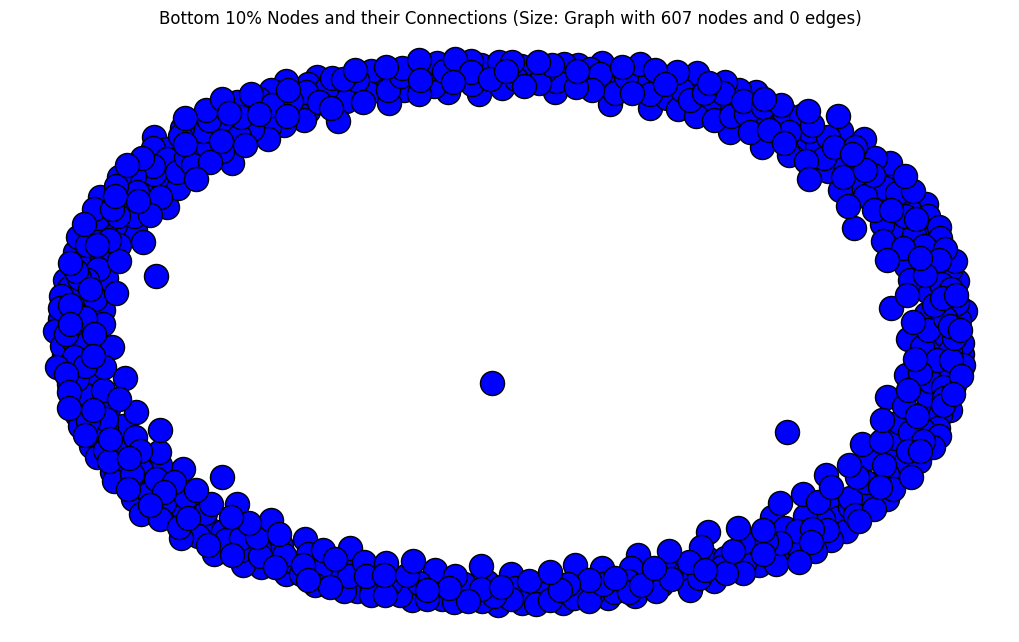

In [466]:
plt.figure(figsize=(10, 6))
nx.draw(bottom_10_subgraph, with_labels=False,
        node_color='blue', width = 4, edgecolors="black")
plt.title(f"Bottom 10% Nodes and their Connections (Size: {bottom_10_subgraph})")
plt.show()

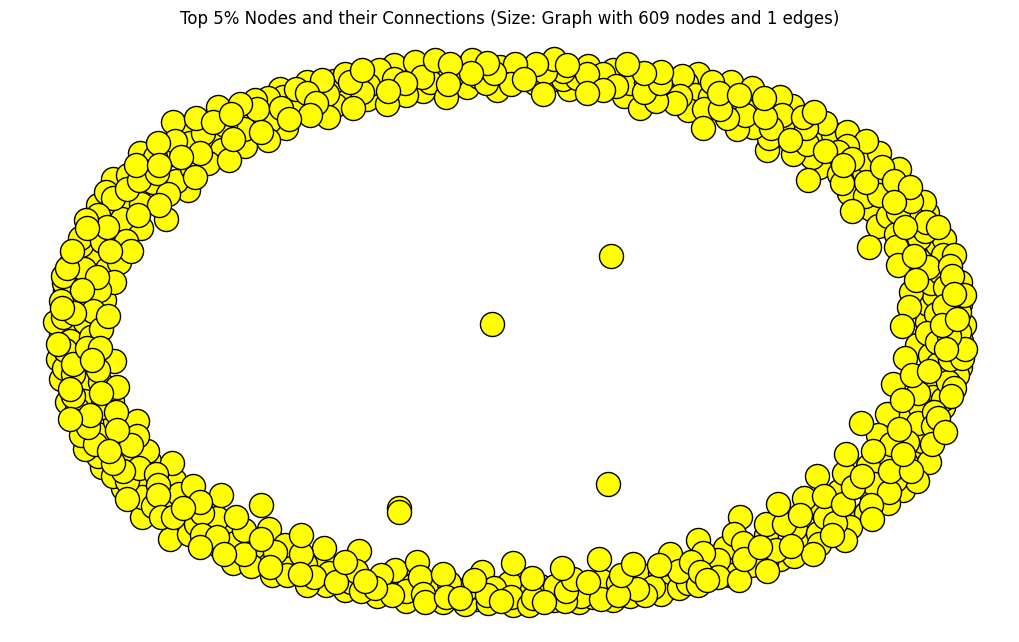

In [465]:
plt.figure(figsize=(10, 6))
nx.draw(top_5_subgraph, with_labels=False,
        node_color='yellow', width = 3, edgecolors="black")
plt.title(f"Top 5% Nodes and their Connections (Size: {top_5_subgraph})")
plt.show()

In [459]:
connected_components = list(nx.connected_components(G))
connected_components_sizes = [len(c) for c in connected_components]

In [460]:
giant_component_size = max(connected_components_sizes)
giant_component = max(connected_components, key=len)
giant_subgraph = G.subgraph(giant_component)

In [461]:
giant_component = connected_components[0]
giant_component_size = len(giant_component)
giant_subgraph = G.subgraph(giant_component)

In [462]:
print(giant_component_size)

750


## Number of nodes in Giant Component : 750

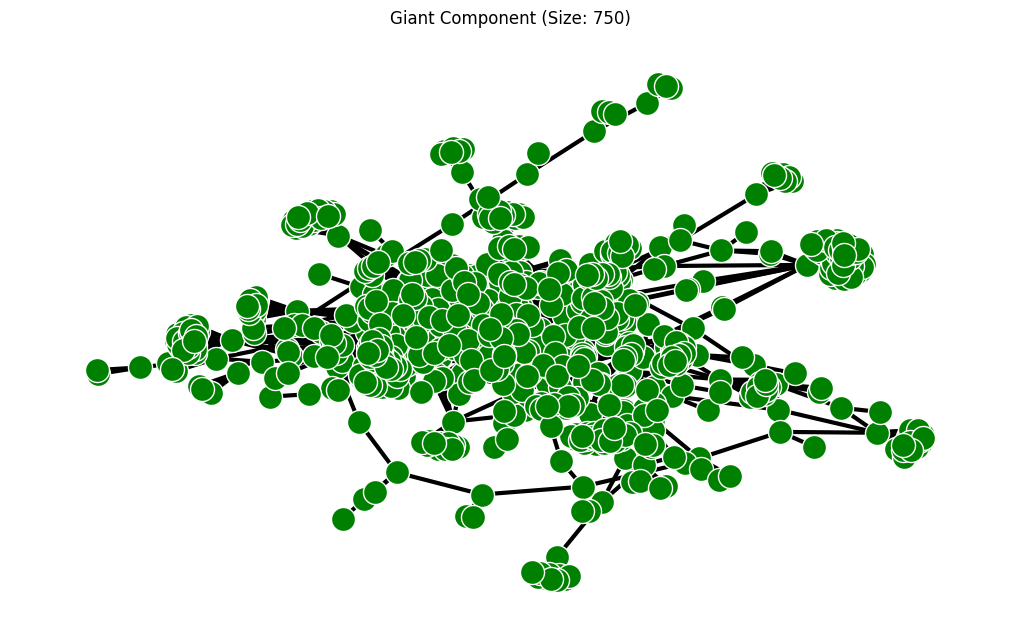

In [390]:
plt.figure(figsize=(10, 6))
nx.draw(giant_subgraph, with_labels=False,
        node_color='green', width = 3, edgecolors="white")
plt.title(f"Giant Component (Size: {giant_component_size})")
plt.show()